<div align="center">
<font size="5">__cta-lstchain: Notebook for training and storage Random Forests for LST1 data analysis__</font>
    
<font size="4">
To run this notebook you will need the last version of cta-lstchain:

git clone https://github.com/cta-observatory/cta-lstchain
<br>
<br>
**If you have ctapipe already installed in a conda environment:**
<br><br>
source activate cta-dev
<br>
python setup.py install
<br>
<font size="4">
**If you don't have ctapipe installed:**</font>
<br><br>
conda env create -f environment.yml
<br>
source activate cta-dev
<br>
python setup.py install

Also, you will need the datafiles from **cta-lstchain-extra:**

git clone https://github.com/cta-observatory/cta-lstchain-extra




<font size="4">
**Some imports...**

In [11]:
import numpy as np                                                                                            
import pandas as pd                                                                                                                                                                                      
import matplotlib.pyplot as plt                                                                               
import joblib                                                                               
from lstchain.reco import dl1_to_dl2     
from lstchain.visualization import plot_dl2                                                                   
from lstchain.reco import utils
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 14

<font size="4">
**Get event DL1 files for training.**
<br>
We need two files, for **gammas** and for **protons**. These gammas are pointlike.

In [5]:
PATH_EVENTS = "../../cta-lstchain-extra/reco/sample_data/dl1/"
gammafile = PATH_EVENTS+"gamma_events_point_tiny.h5"
protonfile = PATH_EVENTS+"proton_events_tiny.h5"

<font size="4">
We read the files as pandas dataframes:

In [6]:
df_gammas = pd.read_hdf(gammafile)                                                               
df_proton = pd.read_hdf(protonfile)
df_gammas.keys()

Index(['obs_id', 'event_id', 'mc_energy', 'mc_alt', 'mc_az', 'mc_core_x',
       'mc_core_y', 'mc_h_first_int', 'mc_type', 'gps_time', 'width', 'length',
       'wl', 'phi', 'psi', 'r', 'x', 'y', 'intensity', 'skewness', 'kurtosis',
       'mc_alt_tel', 'mc_az_tel', 'impact', 'mc_x_max', 'time_gradient',
       'intercept', 'src_x', 'src_y', 'disp', 'hadroness', 'disp_norm'],
      dtype='object')

In [7]:
df_gammas

,obs_id,event_id,mc_energy,mc_alt,mc_az,mc_core_x,mc_core_y,mc_h_first_int,mc_type,gps_time,...,mc_az_tel,impact,mc_x_max,time_gradient,intercept,src_x,src_y,disp,hadroness,disp_norm
257461,11493.0,985506.0,1.984303,1.22173,6.283185,-31.411123,206.735138,23484.177734,0.0,1.445312e+09,...,0.0,217.425949,204.545456,3.544064e+01,4.604139,4.103384e-13,-0.000003,0.509334,0.0,0.509334
102198,10197.0,9684301.0,2.681208,1.22173,6.283185,-313.005280,111.762054,25969.332031,0.0,1.445226e+09,...,0.0,270.529805,215.846161,-1.190717e+01,4.411827,4.103384e-13,-0.000003,0.690055,0.0,0.690055
64736,10164.0,1053801.0,2.432060,1.22173,6.283185,-228.538101,206.667770,24547.943359,0.0,1.445092e+09,...,0.0,266.215577,208.214279,-1.523726e+01,2.157387,4.103384e-13,-0.000003,0.686033,0.0,0.686033
331336,11512.0,7192005.0,1.906059,1.22173,6.283185,-229.295670,-18.551329,21698.644531,0.0,1.445412e+09,...,0.0,159.647596,257.441864,2.406935e+00,10.139431,4.103384e-13,-0.000003,0.383957,0.0,0.383957
414415,11684.0,5491607.0,1.843082,1.22173,6.283185,161.084137,-50.709145,26025.980469,0.0,1.445425e+09,...,0.0,235.188067,190.000000,1.454518e+01,7.133951,4.103384e-13,-0.000003,0.536542,0.0,0.536542
75963,10167.0,815109.0,1.175023,1.22173,6.283185,-222.596390,54.713524,17793.882812,0.0,1.445089e+09,...,0.0,164.643251,186.666672,-2.871639e+01,1.527651,4.103384e-13,-0.000003,0.296508,0.0,0.296508
139752,10387.0,9210703.0,2.177676,1.22173,6.283185,62.680107,-292.372467,27213.660156,0.0,1.445240e+09,...,0.0,314.521078,245.454544,-1.238734e+01,2.399433,4.103384e-13,-0.000003,0.745332,0.0,0.745332
410589,11683.0,5430600.0,2.403500,1.22173,6.283185,-263.972839,57.969070,14133.081055,0.0,1.445423e+09,...,0.0,204.589797,355.600006,3.818074e+00,13.107240,4.103384e-13,-0.000003,0.704025,0.0,0.704025
250058,11491.0,1262901.0,1.998114,1.22173,6.283185,67.404762,-182.364273,25163.562500,0.0,1.445316e+09,...,0.0,222.633839,216.666672,5.412385e+00,12.471532,4.103384e-13,-0.000003,0.477304,0.0,0.477304
397831,11680.0,2460207.0,2.642070,1.22173,6.283185,-340.653442,142.566910,31219.435547,0.0,1.445376e+09,...,0.0,309.298134,199.859161,-1.707462e+01,1.278171,4.103384e-13,-0.000003,0.692407,0.0,0.692407


<font size="4">
From all the previous information, we choose certain features to train the Random Forests:

In [8]:
features = ['log_intensity',                                                                                  
            'time_gradient',                                                                              
            'width',                                                                                      
            'length',                                                                                     
            'wl',                                                                                         
            'phi',                                                                                        
            'psi']

<font size="4">
Now we must split the data into train and test sets. 
Gamma events will train energy and direction reconstruction, and gamma/hadron separation, but protons are only used for separation.

In [23]:
traing, testg = train_test_split(df_gammas, test_size=0.5)
trainp, testp = train_test_split(df_proton, test_size=0.5)
test = test.append(df_proton,ignore_index=True) #Protons are only for testing when trainin Energy/Direction reco.

/Users/rubenlopez/anaconda/envs/cta-dev/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


<font size="4">
**Train the Reconstruction:**
<br>
We train two Random Forest Regressors, from scikit-learn, to reconstruct energy and "disp" of the **test** set.

In [ ]:
RFreg_Energy, RFreg_Disp = dl1_to_dl2.build_models(gammafile, protonfile)

In [25]:
testg

,obs_id,event_id,mc_energy,mc_alt,mc_az,mc_core_x,mc_core_y,mc_h_first_int,mc_type,gps_time,...,mc_az_tel,impact,mc_x_max,time_gradient,intercept,src_x,src_y,disp,hadroness,disp_norm
64580,10164.0,595304.0,1.453976,1.22173,6.283185,-57.939415,-295.879242,25409.921875,0.0,1.445086e+09,...,0.0,288.903187,155.454544,-47.001770,16.632573,4.103384e-13,-0.000003,0.668993,0.0,0.668993
436236,11690.0,3307503.0,1.484766,1.22173,6.283185,-131.118362,237.649399,19615.095703,0.0,1.445393e+09,...,0.0,252.379208,193.529419,-9.859516,8.460217,4.103384e-13,-0.000003,0.578025,0.0,0.578025
299047,11504.0,1331200.0,1.307902,1.22173,6.283185,-170.623489,127.495087,17394.662109,0.0,1.445325e+09,...,0.0,168.124582,238.000000,2.603783,8.765749,4.103384e-13,-0.000003,0.348001,0.0,0.348001
266653,11495.0,5446108.0,2.859771,1.22173,6.283185,-186.001907,167.062012,40452.191406,0.0,1.445387e+09,...,0.0,209.338361,320.740753,-13.075686,6.741784,4.103384e-13,-0.000003,0.608564,0.0,0.608564
41650,10158.0,105603.0,1.814591,1.22173,6.283185,-3.032884,-98.206017,26452.500000,0.0,1.445078e+09,...,0.0,112.995265,197.692307,0.697105,9.289733,4.103384e-13,-0.000003,0.271682,0.0,0.271682
342470,11515.0,6666008.0,1.867916,1.22173,6.283185,-192.043808,-21.653154,21174.054688,0.0,1.445408e+09,...,0.0,122.843461,182.941177,-19.828446,10.062395,4.103384e-13,-0.000003,0.276667,0.0,0.276667
30780,10155.0,1209202.0,1.480075,1.22173,6.283185,-52.810116,17.087959,22691.869141,0.0,1.445095e+09,...,0.0,29.809006,204.285721,14.039881,9.059128,4.103384e-13,-0.000003,0.121009,0.0,0.121009
12841,10150.0,4264105.0,3.283720,1.22173,6.283185,-133.212936,74.745140,30349.935547,0.0,1.445140e+09,...,0.0,103.486616,259.295776,-2.525711,10.628394,4.103384e-13,-0.000003,0.435239,0.0,0.435239
505886,11708.0,6674503.0,3.402924,1.22173,6.283185,142.505798,358.113892,51564.789062,0.0,1.445451e+09,...,0.0,422.677333,262.477051,25.093446,-10.834229,4.103384e-13,-0.000003,1.015247,0.0,1.015247
257700,11493.0,1531606.0,2.001617,1.22173,6.283185,-323.253937,9.290939,19838.019531,0.0,1.445323e+09,...,0.0,253.742337,258.000000,-17.539160,8.064919,4.103384e-13,-0.000003,0.712639,0.0,0.712639


In [19]:
features

['log_intensity', 'time_gradient', 'width', 'length', 'wl', 'phi', 'psi']

<font size="4">
We can now predict the **energy** and **disp** of the test events, and from **disp**, calculate the reconstructed direction.

In [14]:
#Predict energy and direction for the test set:
test['log_reco_energy'] = RFreg_Energy.predict(test[features])                                                      
test['disp_rec'] = RFreg_Disp.predict(test[features])                                                     
                                                                                                              
test['reco_src_x'],test['reco_src_y'] = utils.disp_to_pos(test['disp_rec'],                                 
                                                       test['x'],                                              
                                                       test['y'],                                              
                                                       test['psi'])
test.keys()

Index(['disp', 'event_id', 'gps_time', 'hadroness', 'impact', 'log_intensity',
       'intercept', 'is_train', 'kurtosis', 'length', 'mc_alt', 'mc_alt_tel',
       'mc_az', 'mc_az_tel', 'mc_core_x', 'mc_core_y', 'log_mc_energy',
       'mc_h_first_int', 'mc_type', 'mc_x_max', 'obs_id', 'phi', 'psi', 'r',
       'skewness', 'src_x', 'src_y', 'time_gradient', 'width', 'wl', 'x', 'y',
       'log_reco_energy', 'disp_rec', 'reco_src_x', 'reco_src_y'],
      dtype='object')

<font size="4">
We use this test events with reconstructed energy and direction to **train the gamma/hadron separation.**
<br>
We add these two features to the list of features for training:

In [15]:
features_sep = list(features)                                                                             
features_sep.append('log_reco_energy')                                                                              
features_sep.append('disp_rec')

<font size="4">
We split again the set into **train** and **test**.

In [16]:
train,test = reco_dl1_to_dl2.split_traintest(test,0.75)

<font size="4">
**Train the gamma/hadron classifier:**
<br>
Now we train a scikit-learn **RandomForestClassifier** which will separate events in two classes: 0 for **gammas** and 1 for **protons**. We call this parameter **hadroness**.

In [17]:
#Now we can train the Random Forest Classifier
RFcls_GH = reco_dl1_to_dl2.trainRFsep(train,features_sep)

Given features:  ['log_intensity', 'time_gradient', 'width', 'length', 'wl', 'phi', 'psi', 'log_reco_energy', 'disp_rec']
Number of events for training:  365202
Training Random Forest Classifier for Gamma/Hadron separation...
Random Forest trained!
Done!


<font size="4">
Predict the hadroness of the test events:

In [18]:
test['hadro_rec'] = RFcls_GH.predict(test[features_sep])

<font size="4">
**Save the Random Forests:**
<br>
We can save these trained RF into files to apply them later on any set of data:

In [20]:
fileE = "RFreg_Energy.sav"                                                           
fileD = "RFreg_Disp.sav"                                                             
fileH = "RFcls_GH.sav"                                                               
joblib.dump(RFreg_Energy, fileE)                                                                      
joblib.dump(RFreg_Disp, fileD)                                                                        
joblib.dump(RFcls_GH, fileH)

['RFcls_GH.sav']

<font size="4">
**Now we can plot some results...**
<br><br>
**Distribution of features**

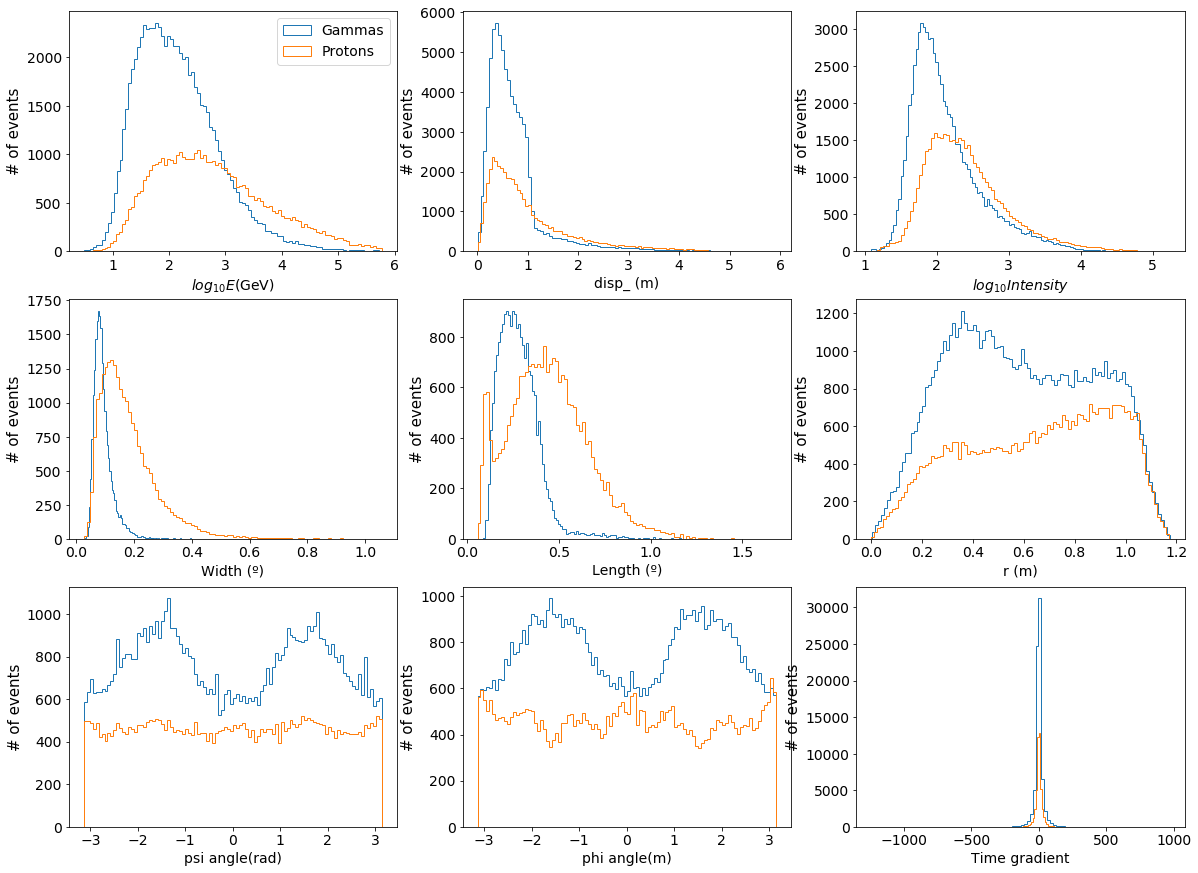

In [45]:
plot_dl2.plot_features(test)

<font size="4">
**Energy reconstruction**

0.03707218517239982 0.6655900815918775


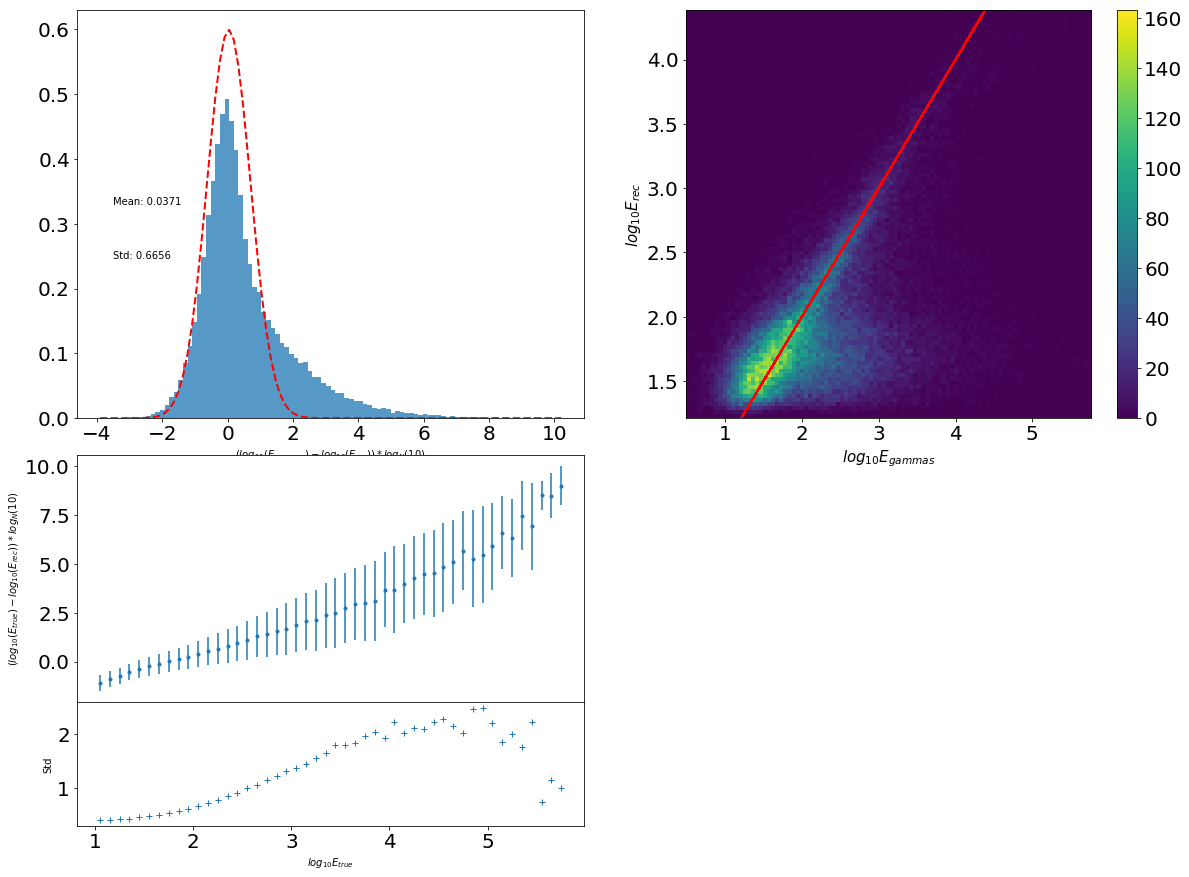

In [42]:
plot_dl2.plot_e(test)

<font size="4">
    **Disp reconstruction**

0.06304875206486528 0.23996262045022812


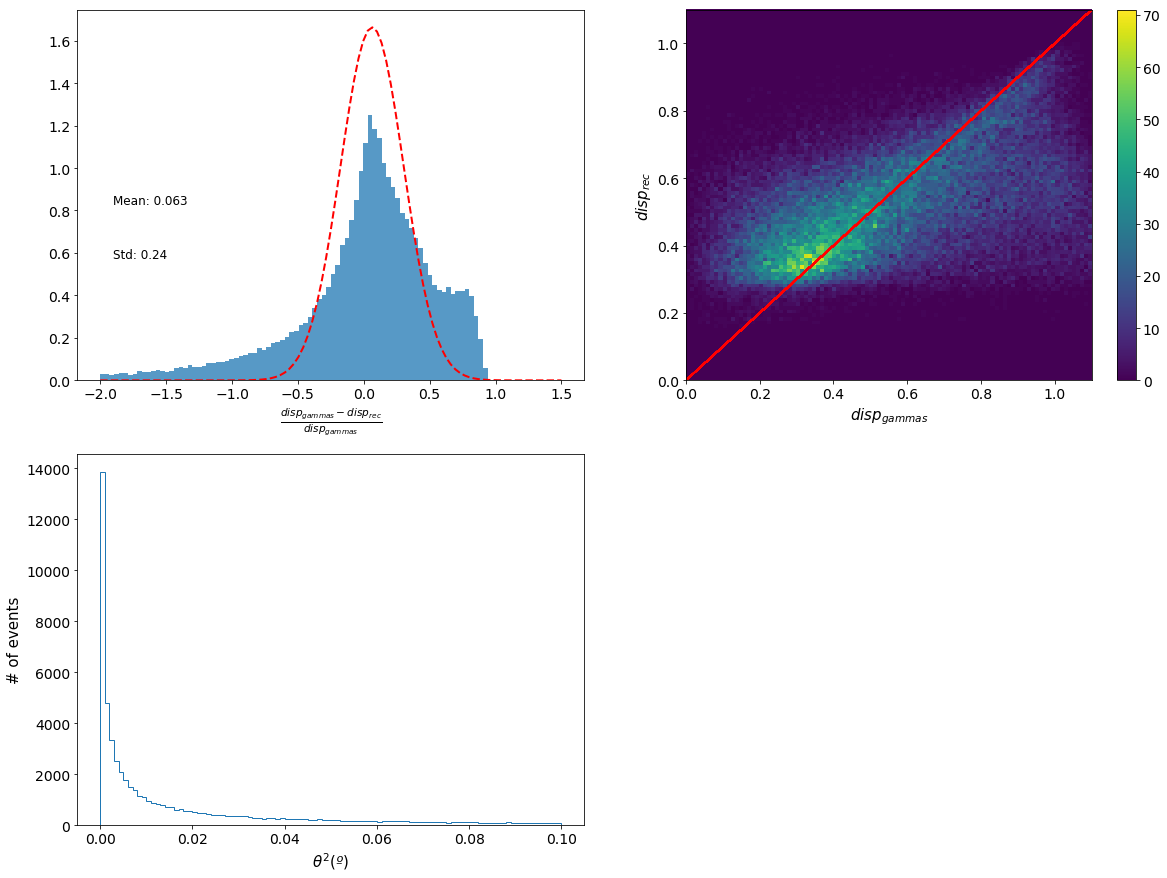

In [27]:
plot_dl2.plot_disp(test)

<font size="4">
**Source position in camera coordinates**

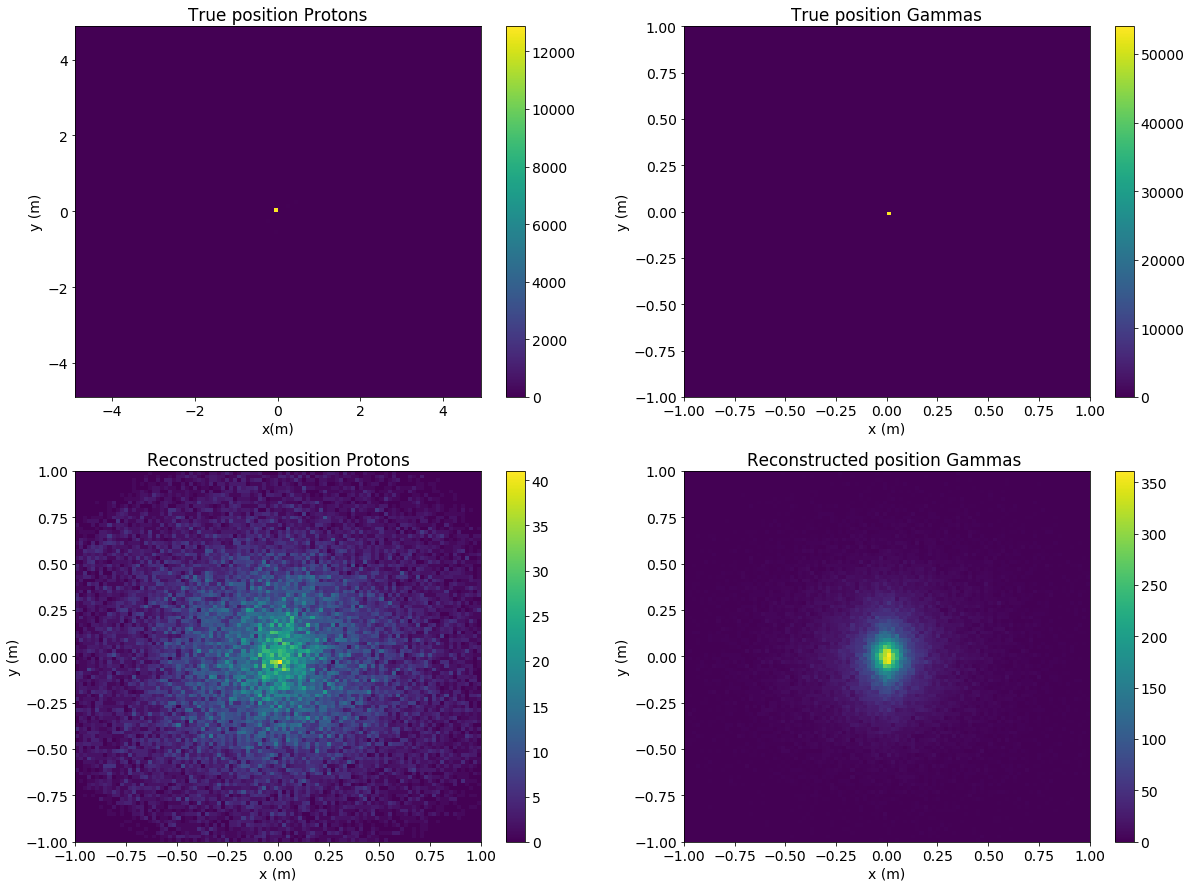

In [30]:
plot_dl2.plot_pos(test)

<font size="4">
**Importance of features for Gamma/Hadron separation**

Feature importances (gini index)
1. width (0.218487)
2. length (0.149491)
3. disp_rec (0.138147)
4. log_intensity (0.107225)
5. time_gradient (0.085866)
6. log_reco_energy (0.084655)
7. wl (0.077336)
8. phi (0.076596)
9. psi (0.062197)


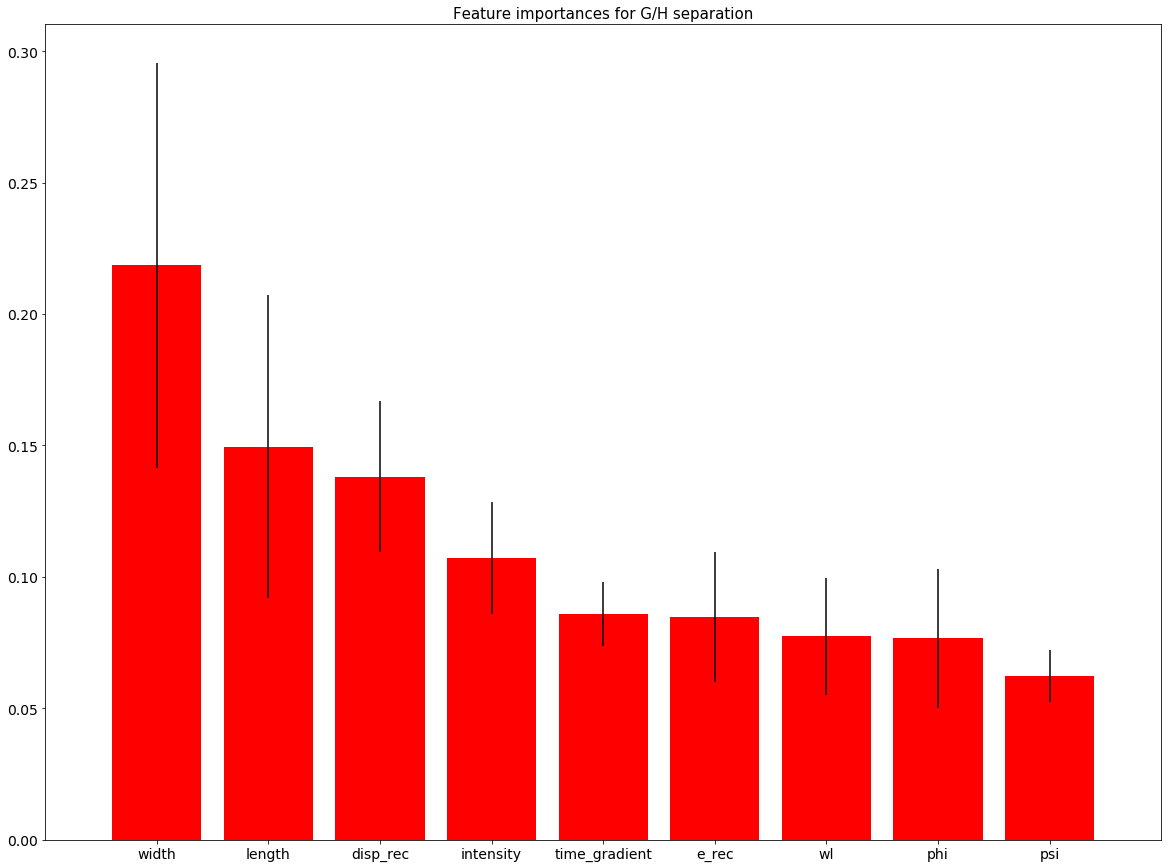

In [32]:
plot_dl2.plot_importances(RFcls_GH,features_sep)

<font size="4">
**ROC curve**

0.716945659937442


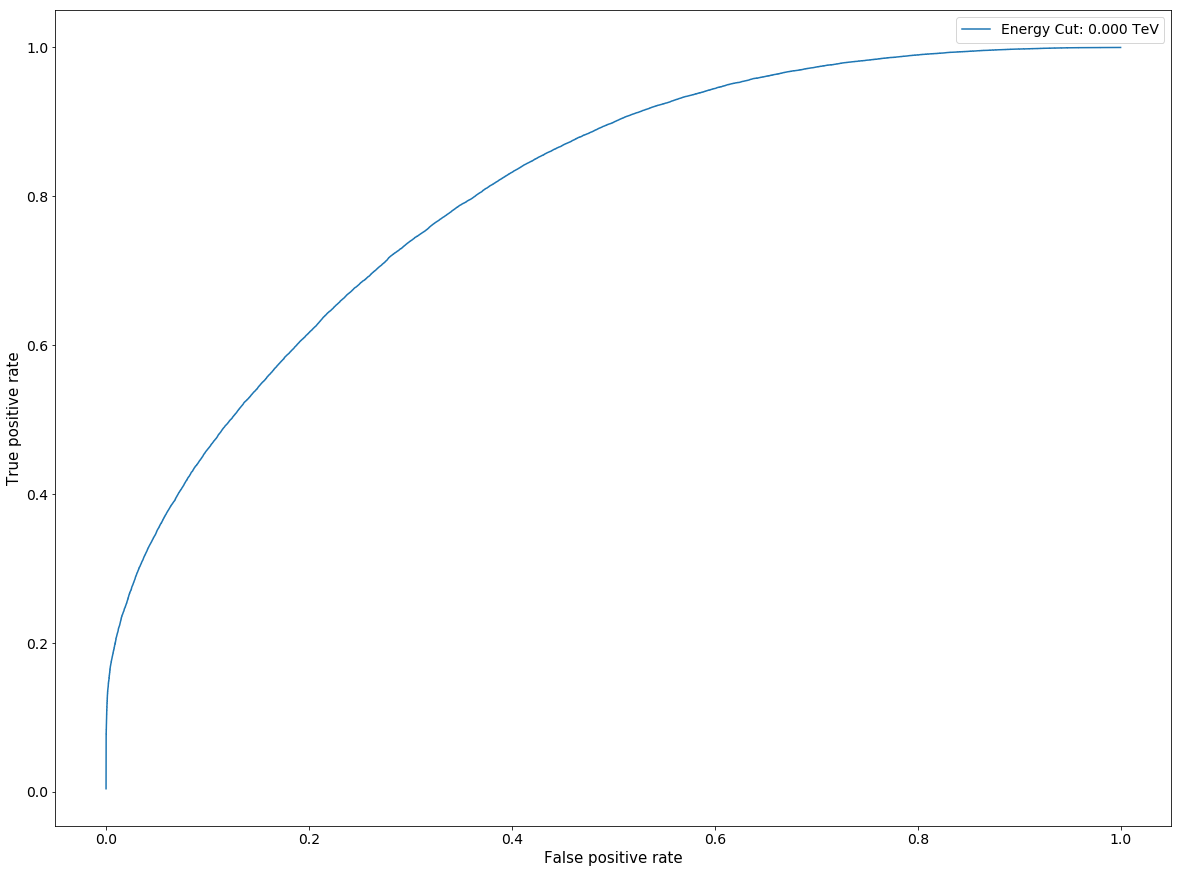

In [33]:
plot_dl2.plot_ROC(RFcls_GH,test,features_sep,-1)

<font size="4">
Mono analysis is very limited, specially at low energies, where it's much more difficult to separate gammas from hadrons without stereo information. If we discard low energy events, we can see that the performance improves.
<br>
<br>
    **For example, we can cut at 500 GeV:**

In [35]:
cut = 500.

e_cut = np.log10(cut) 
test_cut = test[test['log_reco_energy']>e_cut]

0.050117434679284804 0.543312237662998


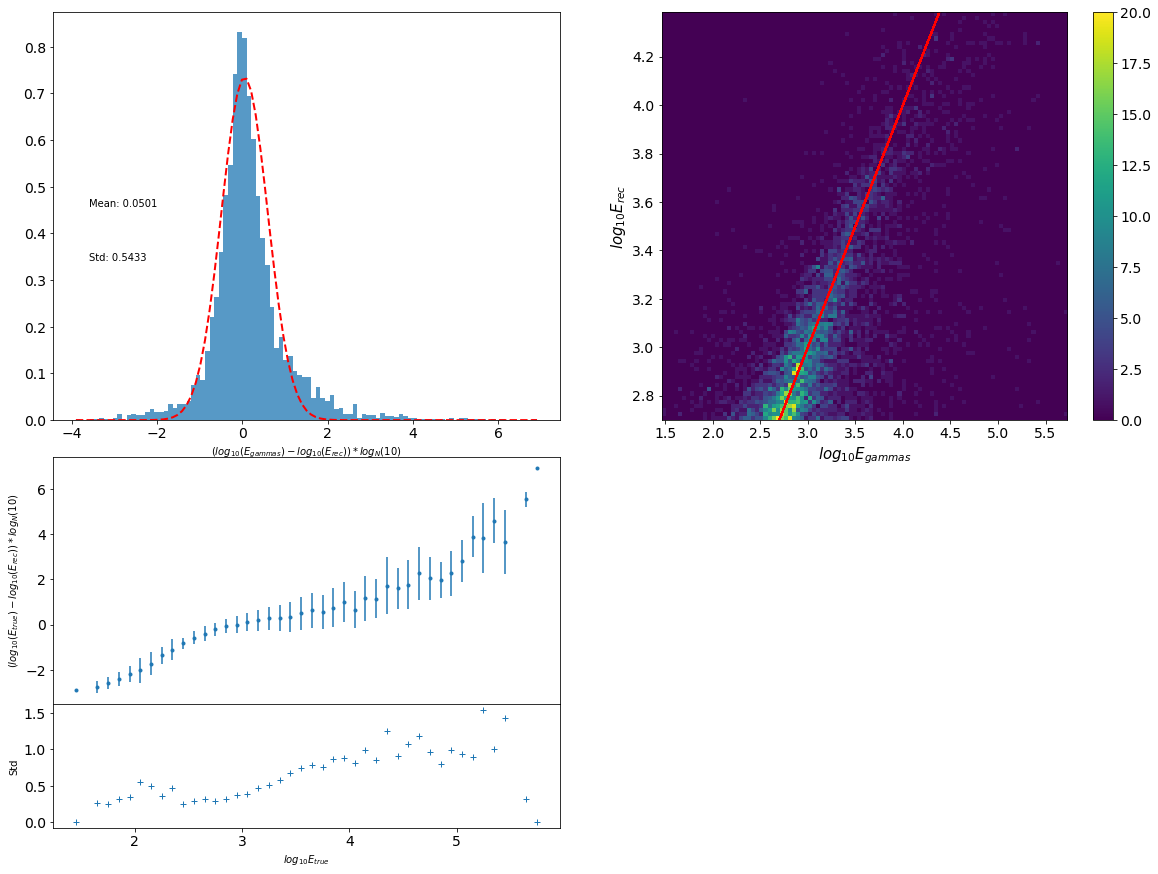

In [36]:
plot_dl2.plot_e(test_cut)

0.013187109659541535 0.14300086957095326


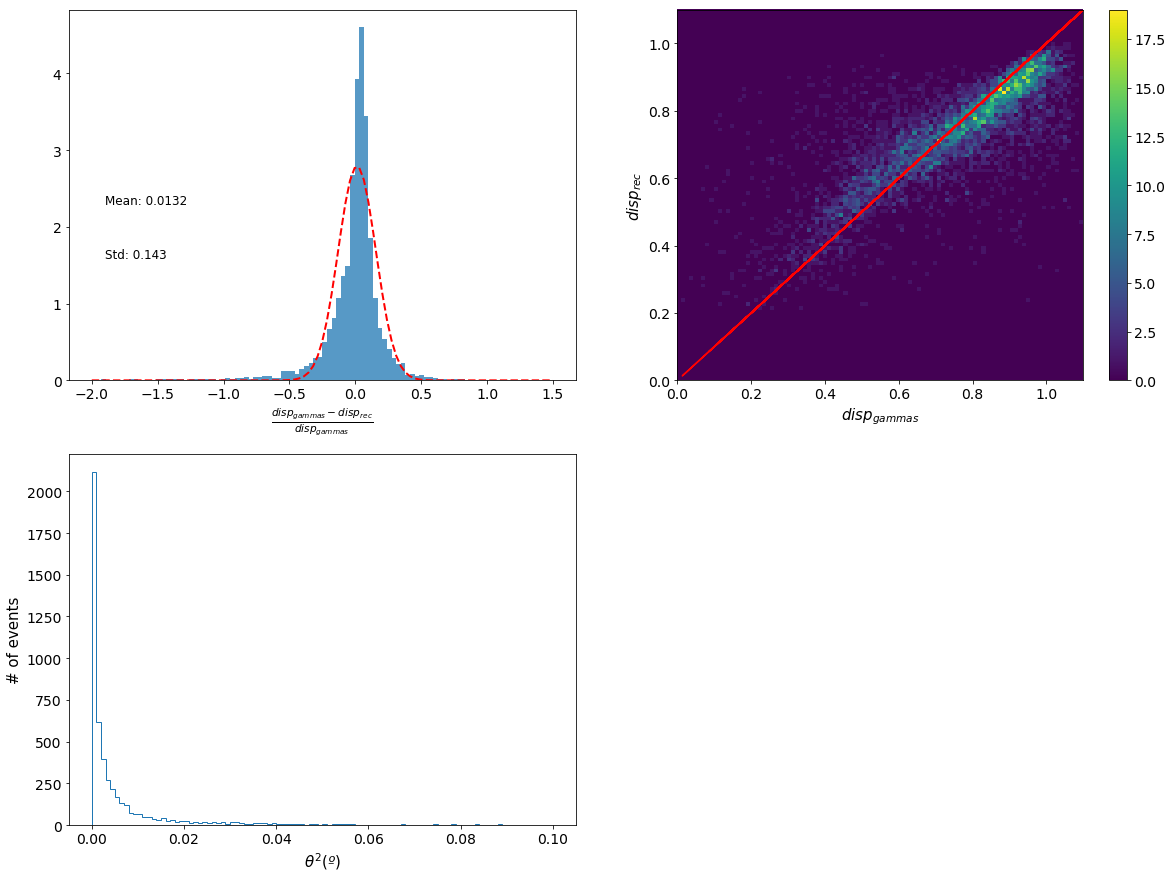

In [37]:
plot_dl2.plot_disp(test_cut)

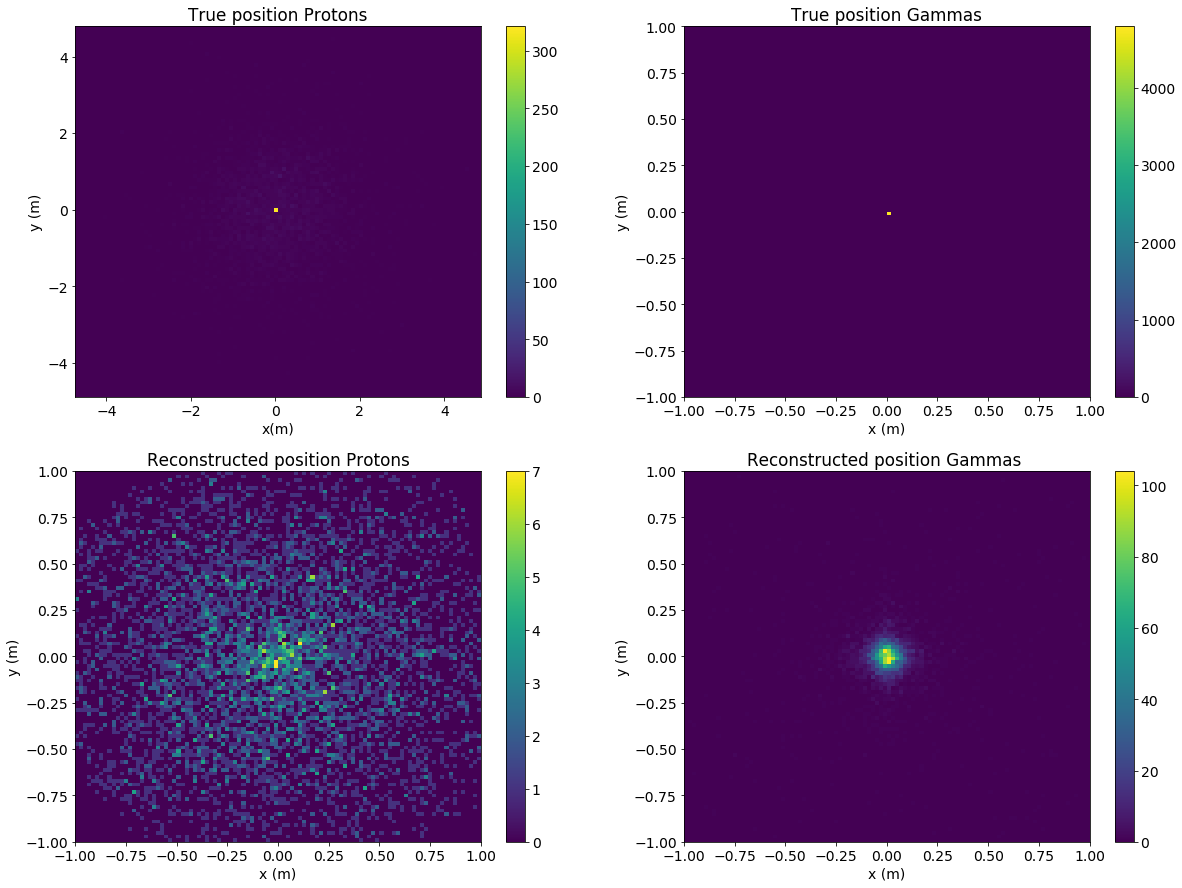

In [38]:
plot_dl2.plot_pos(test_cut)

0.9364823609226595


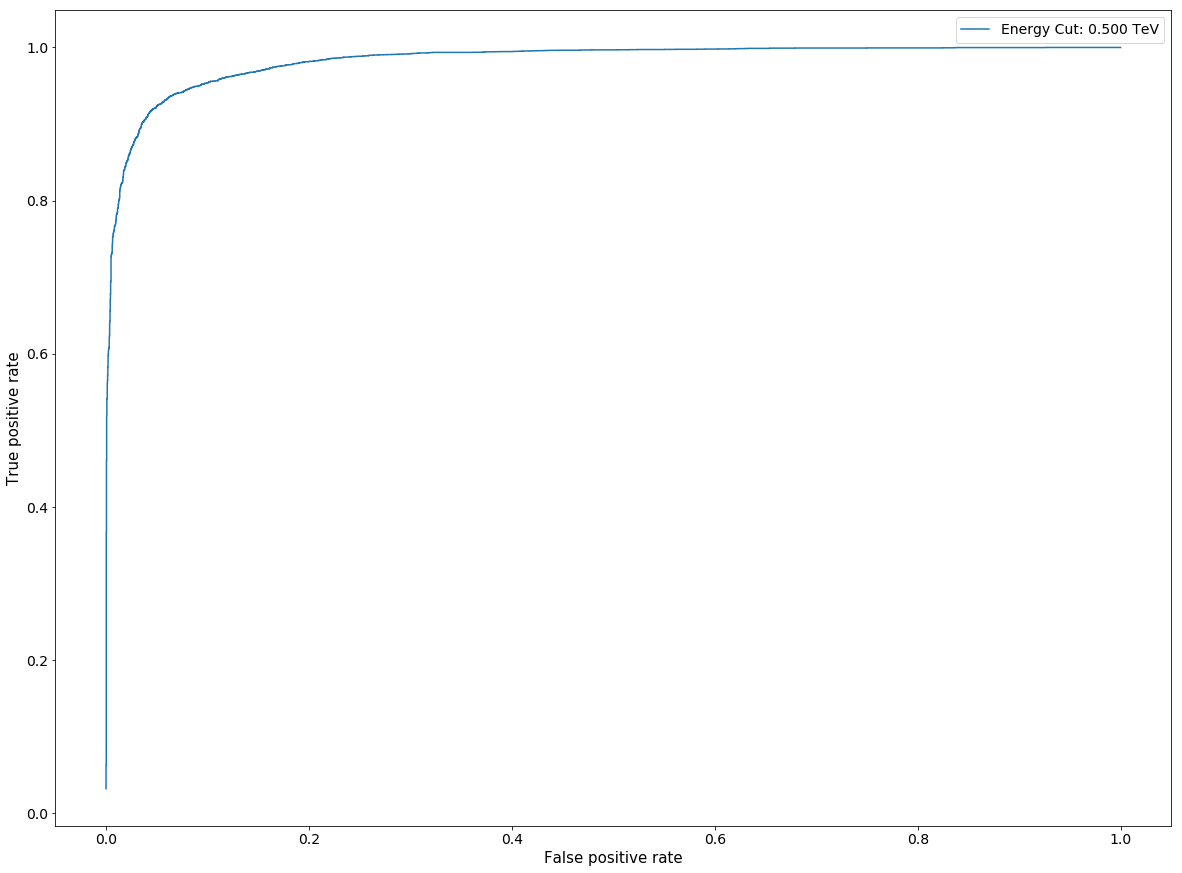

In [39]:
plot_dl2.plot_ROC(RFcls_GH,test_cut,features_sep,e_cut)

<font size="4">
- The reconstruction is still in a very early stage, with close to none optimization of the Random Forests and a rather bad performance. 
- Also, the statistics are very low, we must retrieve more events for training the RF's.
- We've been focusing on having a code that works and can be easily used by anyone.
- **Now it's time to look forward having competitive mono reconstruction!**
